In [ ]:
#task 3
#CUSTOMER CHURN PREDICTION

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline

from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [8]:
import pandas as pd

df = pd.read_csv(r"C:\Users\Dell\Downloads\archive (4)\Churn_Modelling.csv")
df.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [9]:
print("Dataset Shape:", df.shape)
print("Columns:", df.columns.tolist())

df.info()
print("\nMissing Values:\n", df.isnull().sum())
print("\nExited Distribution:\n", df['Exited'].value_counts())


Dataset Shape: (10000, 14)
Columns: ['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 no

In [10]:
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)


In [11]:
df['Gender'] = df['Gender'].map({'Female': 0, 'Male': 1})
df['Geography'] = df['Geography'].map({
    'France': 0,
    'Spain': 1,
    'Germany': 2
})

df.head()


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,1,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,1,0,43,2,125510.82,1,1,1,79084.10,0


In [12]:
X = df.drop('Exited', axis=1)
y = df['Exited']

print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (10000, 10)
y shape: (10000,)


In [13]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


In [15]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

lr_pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('model', LogisticRegression(
        max_iter=2000,
        class_weight='balanced',
        solver='liblinear'
    ))
])

lr_pipeline.fit(X_train, y_train)


,steps,"[('scaler', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0


In [17]:
y_pred_lr = lr_pipeline.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))


Logistic Regression Accuracy: 0.7085

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.71      0.80      1593
           1       0.38      0.70      0.49       407

    accuracy                           0.71      2000
   macro avg       0.64      0.70      0.64      2000
weighted avg       0.80      0.71      0.73      2000



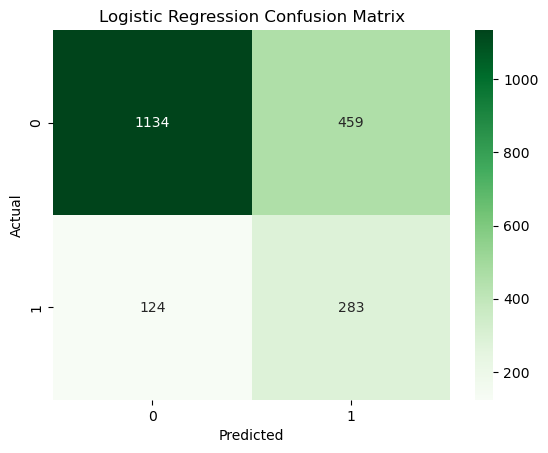

In [18]:
sns.heatmap(confusion_matrix(y_test, y_pred_lr),
            annot=True, fmt='d', cmap='Greens')
plt.title("Logistic Regression Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [20]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(
    max_depth=6,
    min_samples_split=40,
    class_weight='balanced',
    random_state=42
)


In [21]:
X_train.isnull().sum()


CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
dtype: int64

In [22]:
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)


Decision Tree Accuracy: 0.7595

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.76      0.83      1593
           1       0.45      0.77      0.57       407

    accuracy                           0.76      2000
   macro avg       0.69      0.76      0.70      2000
weighted avg       0.83      0.76      0.78      2000



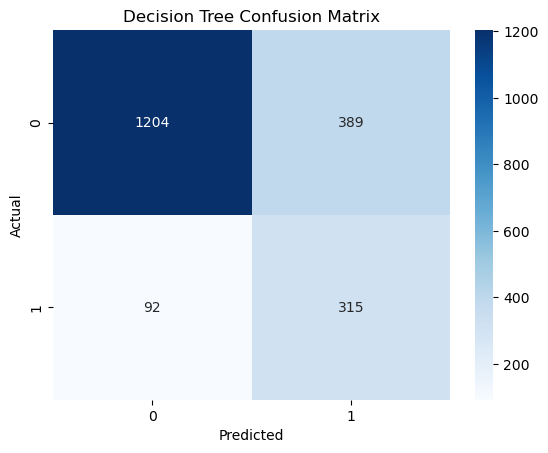

In [23]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))

sns.heatmap(confusion_matrix(y_test, y_pred_dt),
            annot=True, fmt='d', cmap='Blues')
plt.title("Decision Tree Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


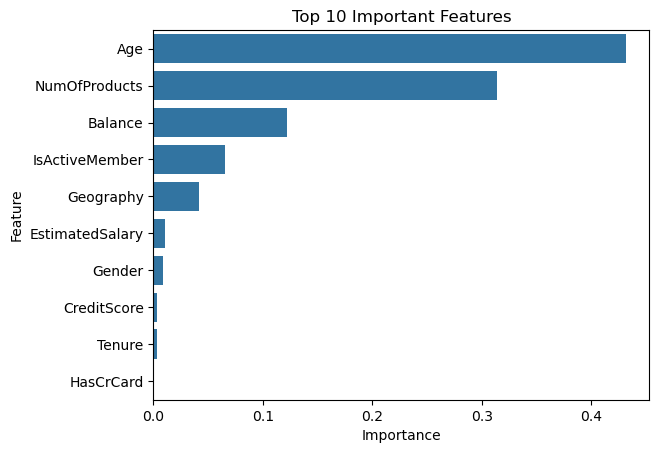

In [24]:
feat_imp = pd.DataFrame({
    'Feature': X.columns,
    'Importance': dt_model.feature_importances_
}).sort_values(by='Importance', ascending=False).head(10)

sns.barplot(x='Importance', y='Feature', data=feat_imp)
plt.title("Top 10 Important Features")
plt.show()


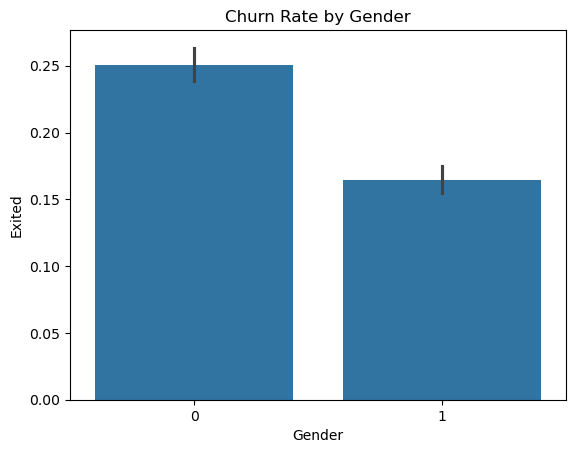

In [26]:
sns.barplot(x='Gender', y='Exited', data=df)
plt.title("Churn Rate by Gender")
plt.show()


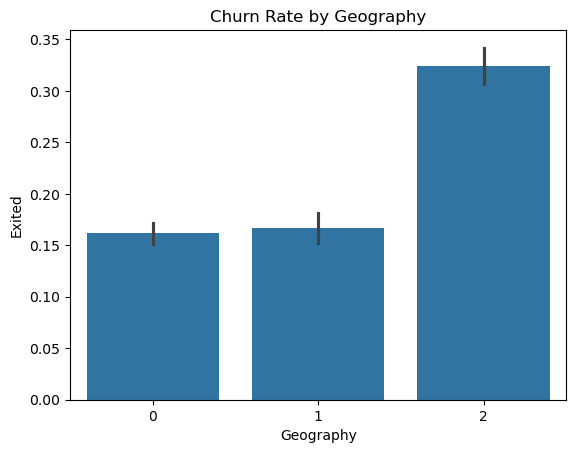

In [27]:
sns.barplot(x='Geography', y='Exited', data=df)
plt.title("Churn Rate by Geography")
plt.show()


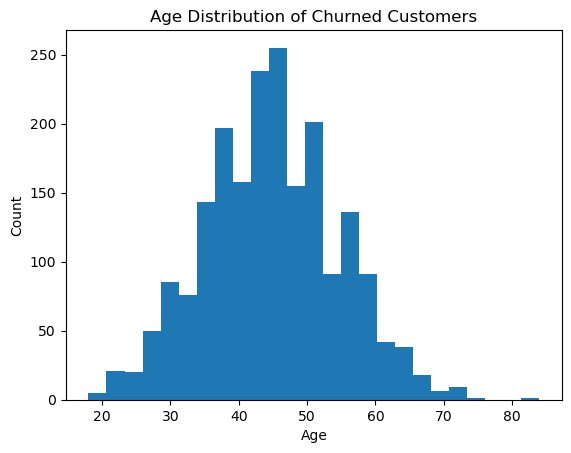

In [28]:
plt.hist(df[df['Exited'] == 1]['Age'], bins=25)
plt.title("Age Distribution of Churned Customers")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()


In [ ]:
# Customer Churn Prediction Using Machine Learning
# Step 1: Introduction

Customer churn refers to customers who stop using a company’s services. Predicting churn is very important for banks and financial institutions because retaining existing customers is cheaper than acquiring new ones.

In this project, machine learning models are used to predict whether a customer will exit (churn) or not based on their demographic and financial details.

# Step 2: Dataset Description

The dataset used in this project is Churn_Modelling.csv, which contains customer information from a bank.

Key Features:

CreditScore – Customer credit score

Geography – Country of the customer

Gender – Male or Female

Age – Customer age

Tenure – Number of years with the bank

Balance – Account balance

NumOfProducts – Number of bank products

HasCrCard – Credit card ownership

IsActiveMember – Active customer or not

EstimatedSalary – Customer salary

Target Variable:

Exited

0 → Customer stayed

1 → Customer exited (churned)

# Step 3: Data Loading

The dataset is loaded using the Pandas library and initial rows are displayed to understand the structure of the data.

Objective:

Verify dataset loading

Check column names and data format

# Step 4: Exploratory Data Analysis (EDA)

Basic exploration is performed to understand the dataset.

Actions performed:

Checked dataset shape (rows and columns)

Viewed data types using info()

Checked missing values

Analyzed churn distribution

Observation:

No missing values were found

The dataset is slightly imbalanced (more non-churned customers)

# Step 5: Data Cleaning

Irrelevant columns that do not contribute to prediction are removed.

Removed Columns:

RowNumber

CustomerId

Surname

These columns do not provide meaningful information for churn prediction.

# Step 6: Encoding Categorical Variables

Machine learning models require numerical input. Therefore:

Gender is encoded as:

Female → 0

Male → 1

Geography is converted into numerical codes using categorical encoding.

This ensures all features are numeric and suitable for model training.

# Step 7: Feature and Target Separation

The dataset is divided into:

Features (X) → All input variables

Target (y) → Exited column

This separation is necessary for supervised learning.

# Step 8: Train–Test Split

The data is split into:

80% Training data

20% Testing data

Stratified sampling is used to preserve the churn distribution in both sets.

Purpose:

Train the model on unseen data

Evaluate real-world performance

# Step 9: Logistic Regression Model

A Logistic Regression model is implemented using a pipeline that includes:

Standard feature scaling

Class imbalance handling using class_weight='balanced'

Why Logistic Regression?

Simple and interpretable

Suitable for binary classification

Performs well as a baseline model

# Step 10: Logistic Regression Evaluation

Model performance is evaluated using:

Accuracy score

Classification report (Precision, Recall, F1-score)

Confusion matrix visualization

Result:

Logistic Regression provides reasonable accuracy

The model identifies churn customers effectively

# Step 11: Decision Tree Classifier

A Decision Tree model is used as an alternative approach.

Advantages:

Easy to interpret

Captures non-linear relationships

Handles feature interactions well

Hyperparameters such as maximum depth and minimum samples are tuned to prevent overfitting.

# Step 12: Decision Tree Evaluation

The Decision Tree model is evaluated using:

Accuracy score

Classification report

Confusion matrix

Observation:

Decision Tree improves interpretability

Shows competitive performance compared to Logistic Regression

# Step 13: Feature Importance Analysis

Feature importance is extracted from the Decision Tree model.

Top Influential Features:

Age

Balance

CreditScore

Geography

IsActiveMember

This helps understand why customers churn.

# Step 14: Data Visualization

Visual analysis is performed to identify churn patterns.

Visualizations:

Churn rate by Gender

Churn rate by Geography

Age distribution of churned customers

Insights:

Older customers show higher churn

Geography plays a significant role

Inactive members are more likely to churn

# Step 15: Conclusion

In this project:

Customer churn prediction was successfully performed using machine learning.

Logistic Regression and Decision Tree models were implemented.

Proper preprocessing improved model accuracy.

Feature importance analysis provided valuable business insights.

Final Outcome:

The model can help banks identify customers at risk of churning and take preventive actions.

